<a href="https://colab.research.google.com/github/nunocesarsa/RS_BioTraits/blob/master/%5CRTM%5CHyperspectral_to_Sentinel_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#this code snippet will receive a prosail spectra and output a S2A spectra 


#Installing PROSAIL
!pip install prosail

#latin hypercube stuff
#lets try to do a LHS
!pip install lhsmdu


In [0]:
#importing packages

#regular packages for python
import matplotlib.pyplot as plt
import numpy
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

#rtm model
import prosail

#importing pandas
import pandas as pd


#upload a S2_Response.csv from https://earth.esa.int/web/sentinel/user-guides/sentinel-2-msi/document-library/-/asset_publisher/Wk0TKajiISaR/content/sentinel-2a-spectral-responses


In [0]:
#loading the CSV

#remove the special inputs sep and decimal if needed
filepath="type file path here"
filepath="/home/mydata/S2_Response.csv"
s2_table = pd.read_csv(filepath,sep=";",decimal=",")

#making 0 equal to NA - remove if necessary
#s2_table.replace(0,np.nan,inplace=True)

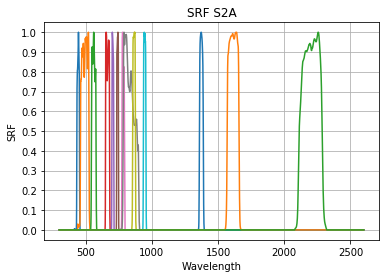

In [0]:



fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(s2_table['SR_WL'])
ax.set_yticks(numpy.arange(0,1.1,0.1))
ax.set_title("SRF S2A")
ax.set_xlabel("Wavelength")
ax.set_ylabel("SRF")
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B1'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B2'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B3'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B4'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B5'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B6'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B7'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B8'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B8A'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B9'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B10'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B11'])
plt.plot(s2_table['SR_WL'],s2_table['S2A_SR_AV_B12'])
plt.grid()
plt.show()

[ 400  401  402 ... 2498 2499 2500]


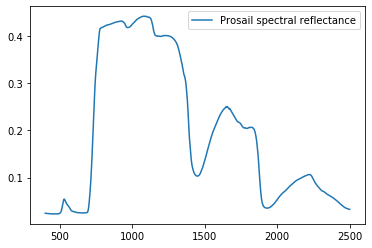

In [0]:
#generating a prosail 
#aux for x axis
x = np.arange(400,2501)
x[-1]

print(x)

#setting up default values for PROSAIL:

#https://github.com/jgomezdans/prosail
#lets make a stupid list of defaults
n=1.5
cab=80.
car=8.
cw=0.0
cbrown=0.01
cm=0.009
lai =3.


#leaf angles are bit messier - before choosing lidfa we must check how ti relates with typelidf
#typelidf = 1 #implies that we should give it 2 paramaters 
#typelidf = 2 #implies elipsoidal distributions with only lidfa being given: etc etc
#default is 2, we keep it as such because this is just a playaround

lidfa = -0.35 #
lidfb=-0.15

#lidfa = 0.0 #default value

#hotspot is a kind of weird concept 
hspot=0.01

#observer position
tts=30.
tto=10. 
psi=0.

rho_t = prosail.run_prosail(n, cab, car, cw, cbrown, cm, lai, lidfa, hspot, 
                            tts, tto, psi,
                            prospect_version='D', typelidf=1, lidfb=-0.15,
                            factor='SDR', rsoil=1., psoil=1.)


plt.plot ( x, rho_t, label="Prosail spectral reflectance")
plt.legend(loc='best')
plt.show()

In [0]:

#now we create the table for the output
s2_table_sel = s2_table[s2_table['SR_WL'].between(400,2500)]

#print(s2_table_sel)


#s2_refl.shape
#print(s2_refl)
#then we sum all the weights of each band 
w_band_sum = s2_table_sel.sum(axis=0,skipna = True)
#print(w_band_sum)

#now we multiply each band for the value of the prosail, per band
#rho_s2 = s2_table_sel
rho_t_df = pd.DataFrame(data=rho_t,columns=["rho"],index=s2_table_sel.index)
#rho_s2['S2A_SR_AV_B1']

#trials, multiplying is not so obvious as it should.. 

rho_s2 = s2_table_sel.multiply(rho_t_df['rho'],axis="index")
#print(rho_t_df)
#print(rho_s2.shape)
#print(rho_t_df.shape)
#print(rho_s2.mul(rho_t_df.iloc[1]))
#print(rho_s2*rho_t_df)
#print(rho_s2.multiply(rho_t_df['rho'],axis="index"))

#print(s2_table_sel)
rho_s2['SR_WL']=s2_table_sel['SR_WL']
print(rho_s2)

#[['S2A_SR_AV_B1']]
#print(rho_t_df)
#print(rho_t_df*rho_s2['S2A_SR_AV_B1'])

      SR_WL  S2A_SR_AV_B1  ...  S2A_SR_AV_B11  S2A_SR_AV_B12
100     400           0.0  ...            0.0            0.0
101     401           0.0  ...            0.0            0.0
102     402           0.0  ...            0.0            0.0
103     403           0.0  ...            0.0            0.0
104     404           0.0  ...            0.0            0.0
...     ...           ...  ...            ...            ...
2196   2496           0.0  ...            0.0            0.0
2197   2497           0.0  ...            0.0            0.0
2198   2498           0.0  ...            0.0            0.0
2199   2499           0.0  ...            0.0            0.0
2200   2500           0.0  ...            0.0            0.0

[2101 rows x 14 columns]


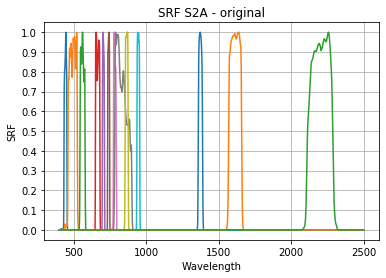

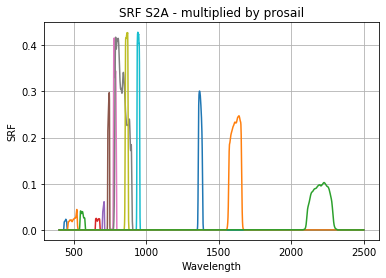

In [0]:
#now lets test if the above actually did anything...
fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(s2_table['SR_WL'])
ax.set_yticks(numpy.arange(0,1.1,0.1))
ax.set_title("SRF S2A - original")
ax.set_xlabel("Wavelength")
ax.set_ylabel("SRF")
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B1'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B2'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B3'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B4'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B5'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B6'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B7'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B8'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B8A'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B9'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B10'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B11'])
plt.plot(s2_table_sel['SR_WL'],s2_table_sel['S2A_SR_AV_B12'])
plt.grid()
plt.show()


fig = plt.figure()
ax = fig.gca()
#ax.set_xticks(rho_s2['SR_WL'])
ax.set_yticks(numpy.arange(0,1.1,0.1))
ax.set_title("SRF S2A - multiplied by prosail")
ax.set_xlabel("Wavelength")
ax.set_ylabel("SRF")
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B1'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B2'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B3'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B4'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B5'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B6'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B7'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B8'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B8A'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B9'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B10'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B11'])
plt.plot(rho_s2['SR_WL'],rho_s2['S2A_SR_AV_B12'])
plt.grid()
plt.show()




In [0]:
#now all that is left is summarizing everything

print(rho_s2.sum(axis=0)/w_band_sum ) #voila

final = (rho_s2.sum(axis=0)/w_band_sum).rename_axis("ID").values

print(final)
type(final)
#type(final.rename_axis("ID").values)

NameError: ignored

In [0]:
#lets do the same a above but as a function 

def Prosail2S2(path2csv,spectra_input):
  #importing pandas
  import pandas as pd
  import numpy
  import numpy as np
  #upload a S2_Response.csv from https://earth.esa.int/web/sentinel/user-guides/sentinel-2-msi/document-library/-/asset_publisher/Wk0TKajiISaR/content/sentinel-2a-spectral-responses

  s2_table = pd.read_csv(path2csv,sep=";",decimal=",") #check if this is proper, regarding the sep and dec
  s2_table_sel = s2_table[s2_table['SR_WL'].between(400,2500)]
  w_band_sum = s2_table_sel.sum(axis=0,skipna = True)
  spectra_input_df = pd.DataFrame(data=spectra_input,columns=["rho"],index=s2_table_sel.index)
  rho_s2 = s2_table_sel.multiply(spectra_input_df['rho'],axis="index")

  output = (rho_s2.sum(axis=0)/w_band_sum).rename_axis("ID").values #runs the weighted mean sum and converts it to a numpy
  return output[1:] #removes the first value because it was the wavelength information

#seems to work 
filepath="/content/S2_Response.csv"
print(Prosail2S2(filepath,rho_t))




[0.01470931 0.01972779 0.03673717 0.01273357 0.05037675 0.31800704
 0.52795561 0.52988877 0.52925864 0.50984228 0.26778743 0.21989608
 0.0847468 ]


           LAI        Cab        Cm
0     1.955162  25.939672  0.006051
1     0.513532  19.731785  0.008066
2     2.897248  59.151256  0.005951
3    10.335182  48.438278  0.001977
4     3.819084  78.159678  0.007020
..         ...        ...       ...
495   6.634612  77.718342  0.006319
496   6.888178  58.141144  0.004505
497   5.594614  90.439969  0.007524
498   6.837083  13.441075  0.004452
499   5.943937  68.668073  0.003092

[500 rows x 3 columns]


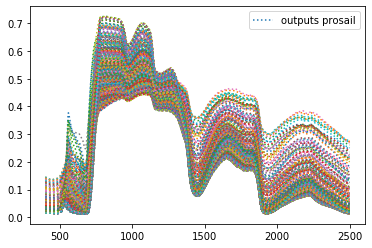

In [0]:
#let's try a loop; 
#first we generate hyperspectral spectra

#latin hypercube stuff
import lhsmdu

samples_n = 500
trait_3d_lhs = lhsmdu.createRandomStandardUniformMatrix(3,samples_n) #perhaps this one is not as good but its definitly faster

#now it is easy to plot or access each trait 

LAI_max = 10.
Chl_max = 90.
CmL_max = 0.008

#this weird code makes a dataframe like i prefer
pd_trait3d = pd.DataFrame.transpose(pd.DataFrame(trait_3d_lhs))
pd_trait3d.columns = ["LAI","Cab","Cm"]

#this is better than using a stupid loop... # i sum the values in the end to reduce the risk of undetermined values
pd_trait3d["LAI"]=pd_trait3d["LAI"]*LAI_max+.5
pd_trait3d["Cab"]=pd_trait3d["Cab"]*Chl_max+1
pd_trait3d["Cm"]=pd_trait3d["Cm"]*CmL_max+.001

#looks good
print(pd_trait3d)

#aux for x axis
x = np.arange(400,2501)
x[-1]


k = 1
#for i in range(10):
for i in range(len(pd_trait3d)):
    #print(i)

    lai_t = pd_trait3d["LAI"][i]
    cab_t = pd_trait3d["Cab"][i]
    cm_t = pd_trait3d["Cm"][i]


    if k == 1:
      rho_s = prosail.run_prosail(n, cab_t, car, cw, cbrown, cm_t, lai_t, lidfa, hspot, 
                                 tts, tto, psi,
                                 prospect_version='D', typelidf=1, lidfb=-0.15,
                                 factor='SDR', rsoil=1., psoil=1.)
      plt.plot ( x, rho_s, ':', label="outputs prosail")
      plt.legend(loc='best')
      
    if k > 1:
      rho_t = prosail.run_prosail(n, cab_t, car, cw, cbrown, cm_t, lai_t, lidfa, hspot, 
                                tts, tto, psi,
                                prospect_version='D', typelidf=1, lidfb=-0.15,
                                factor='SDR', rsoil=1., psoil=1.)  
      rho_s = numpy.vstack((rho_s,rho_t))
      plt.plot ( x, rho_t, ':')

    
    k = k+1

plt.show()



[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


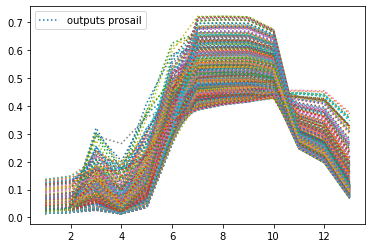

In [0]:
#now lets transform it to a sentinel
filepath="/content/S2_Response.csv"

#aux for x axis
x_S2 = np.arange(1,14)
print(x_S2)

k = 1
#for i in range(10):
for i in range(len(pd_trait3d)):
    #print(i)

    lai_t = pd_trait3d["LAI"][i]
    cab_t = pd_trait3d["Cab"][i]
    cm_t = pd_trait3d["Cm"][i]


    if k == 1:
      rho_s_s2 = prosail.run_prosail(n, cab_t, car, cw, cbrown, cm_t, lai_t, lidfa, hspot, 
                                 tts, tto, psi,
                                 prospect_version='D', typelidf=1, lidfb=-0.15,
                                 factor='SDR', rsoil=1., psoil=1.)
      
      rho_s_s2 = Prosail2S2(filepath,rho_s_s2)
      plt.plot ( x_S2, rho_s_s2, ':', label="outputs prosail")
      plt.legend(loc='best')
      
    if k > 1:
      rho_t_s2 = prosail.run_prosail(n, cab_t, car, cw, cbrown, cm_t, lai_t, lidfa, hspot, 
                                tts, tto, psi,
                                prospect_version='D', typelidf=1, lidfb=-0.15,
                                factor='SDR', rsoil=1., psoil=1.)
      rho_t_s2 = Prosail2S2(filepath,rho_t_s2)
      rho_s_s2 = numpy.vstack((rho_s_s2,rho_t_s2))
      #rho_s = numpy.vstack((rho_s,rho_t))
      plt.plot ( x_S2, rho_t_s2, ':')

    
    k = k+1

plt.show()


In [0]:
#checking data structures

print(rho_s.shape)
print(rho_s_s2.shape)
#seems fine, the band order is as follows: 
#S2A_SR_AV_B1	S2A_SR_AV_B2	S2A_SR_AV_B3	
#S2A_SR_AV_B4	S2A_SR_AV_B5	S2A_SR_AV_B6	
#S2A_SR_AV_B7	S2A_SR_AV_B8	S2A_SR_AV_B8A	
#S2A_SR_AV_B9	S2A_SR_AV_B10	S2A_SR_AV_B11	
#S2A_SR_AV_B12



(500, 2101)
(500, 13)
